In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("/kaggle/input/ford-car-price-prediction/ford.csv")
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.info()
df.describe()
df.mode().iloc[0]
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

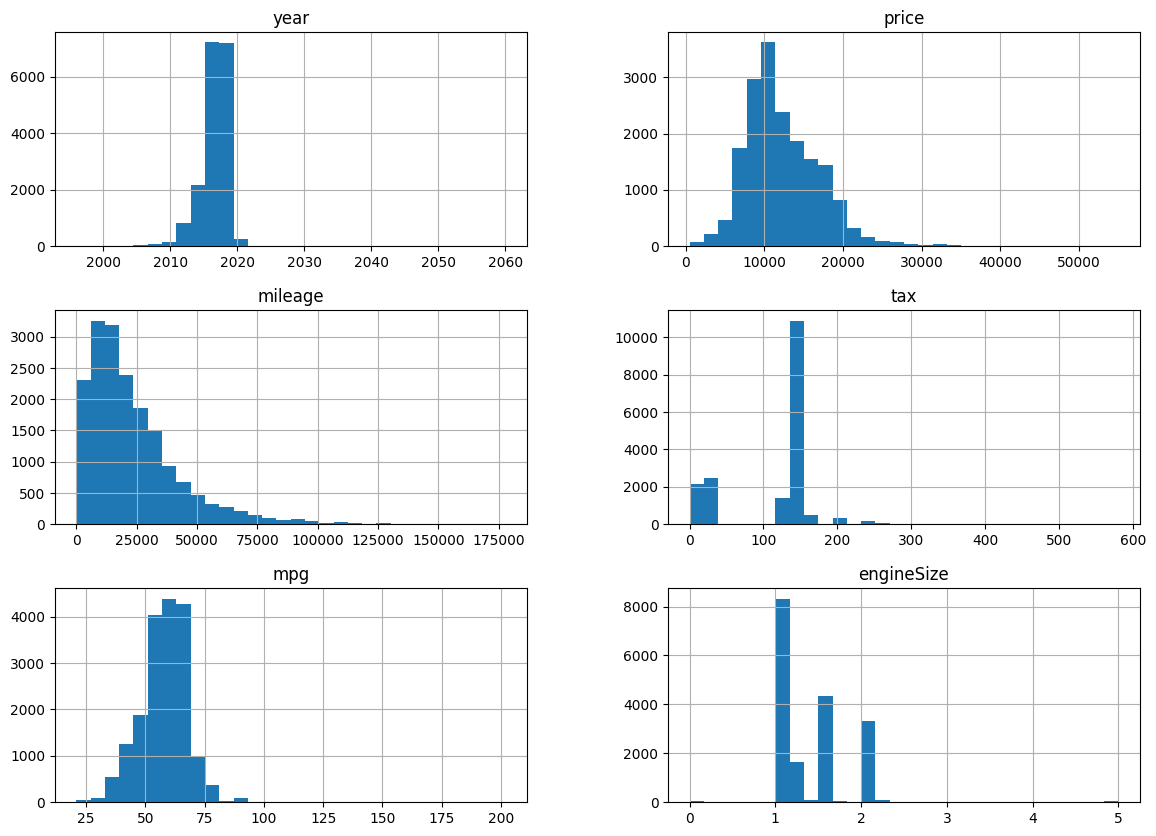

In [4]:
df.hist(figsize=(14,10), bins=30)
plt.show()


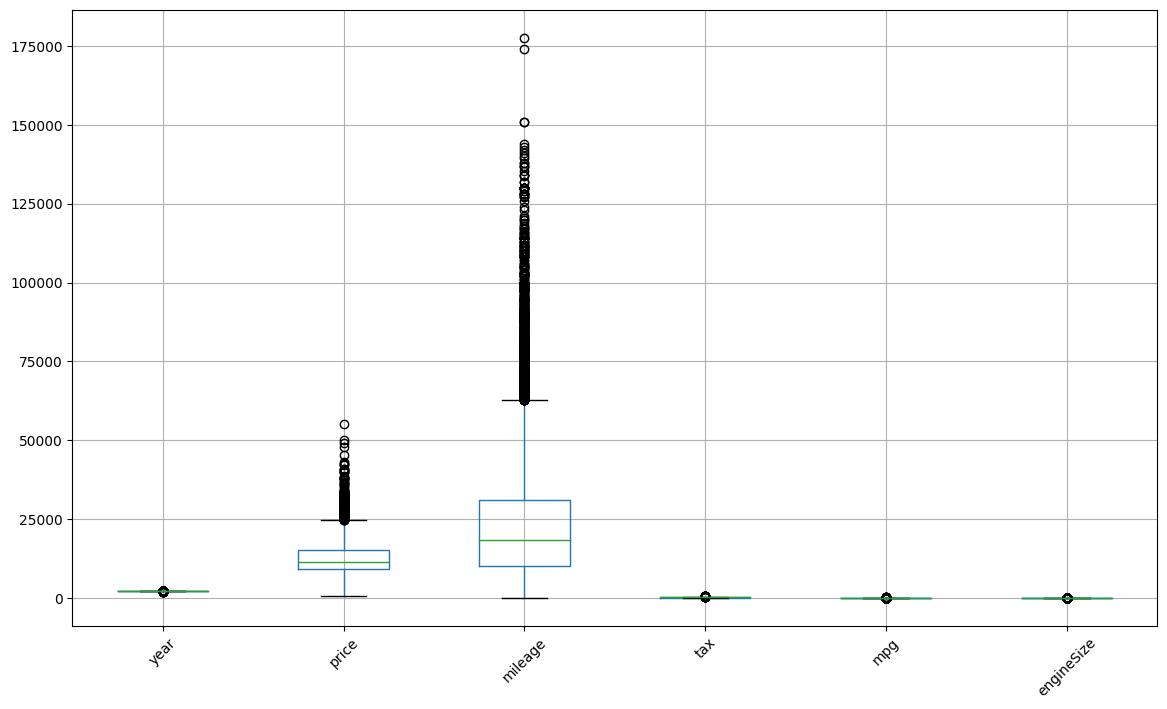

In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14,8))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.show()


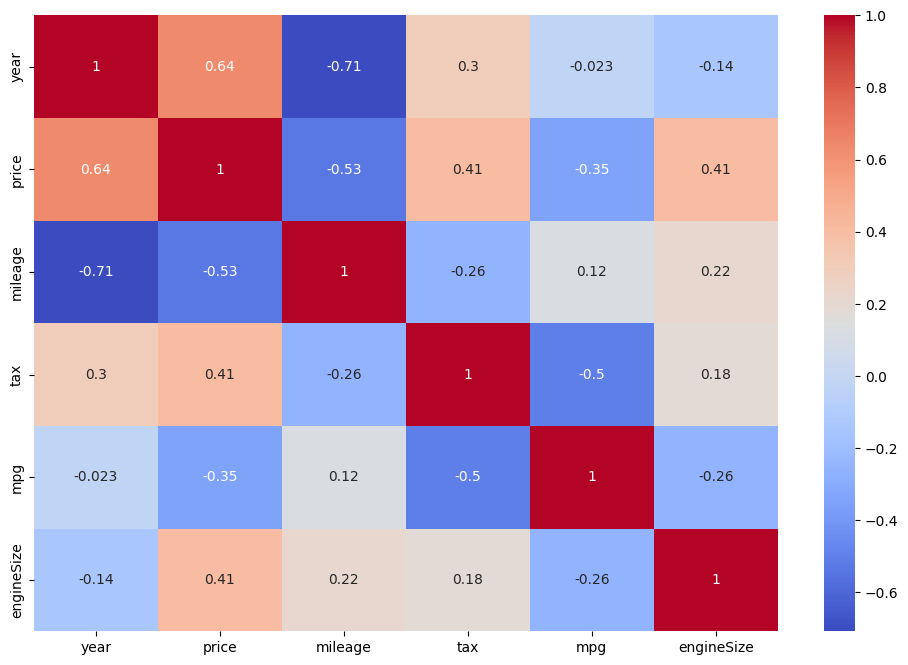

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


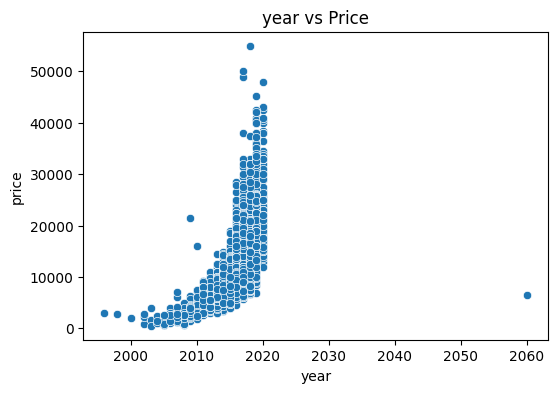

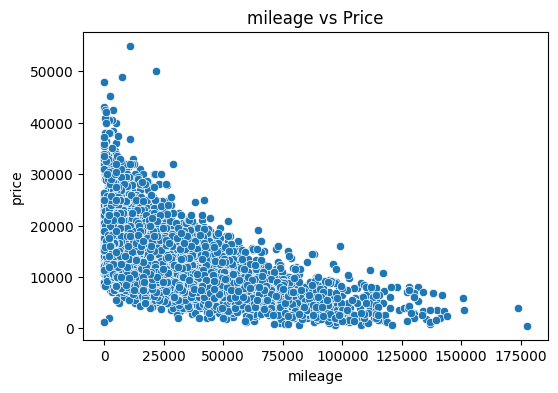

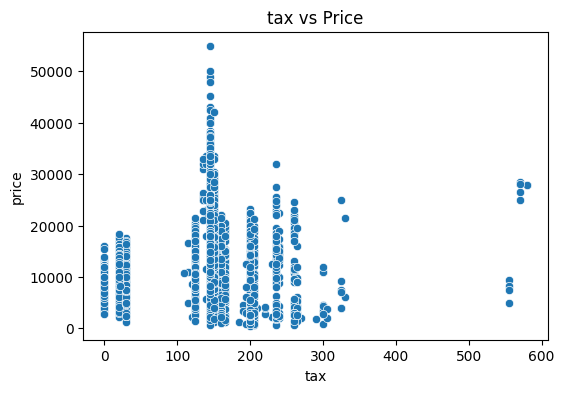

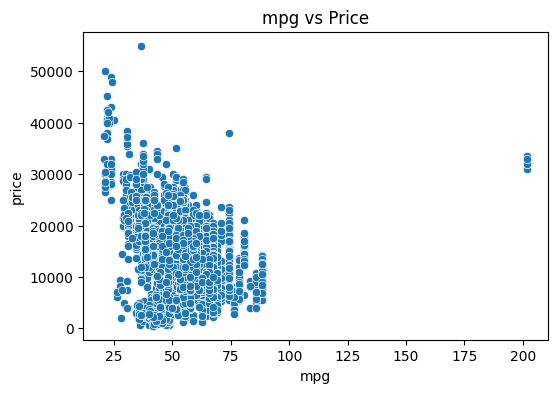

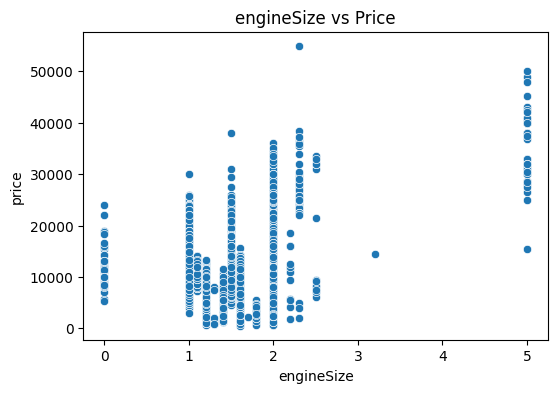

In [8]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop("price")

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["price"])
    plt.title(f"{col} vs Price")
    plt.show()


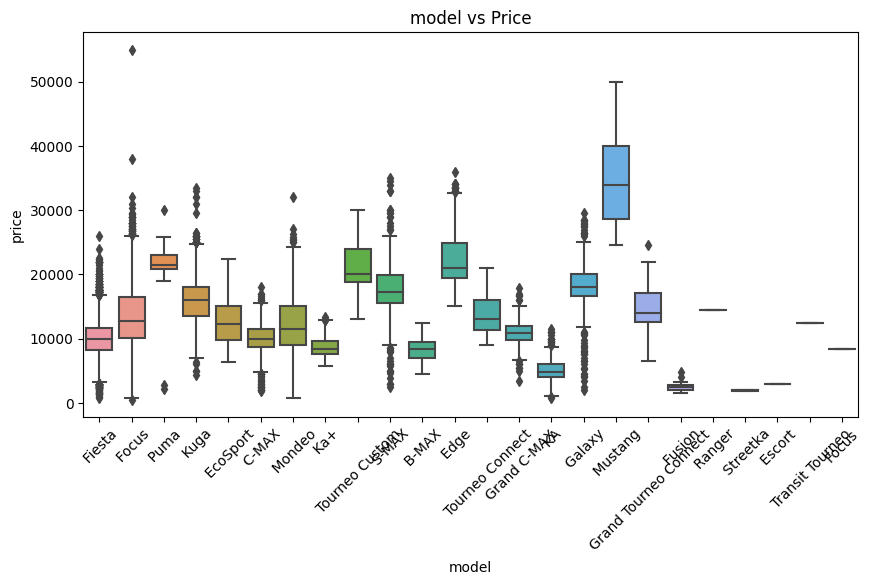

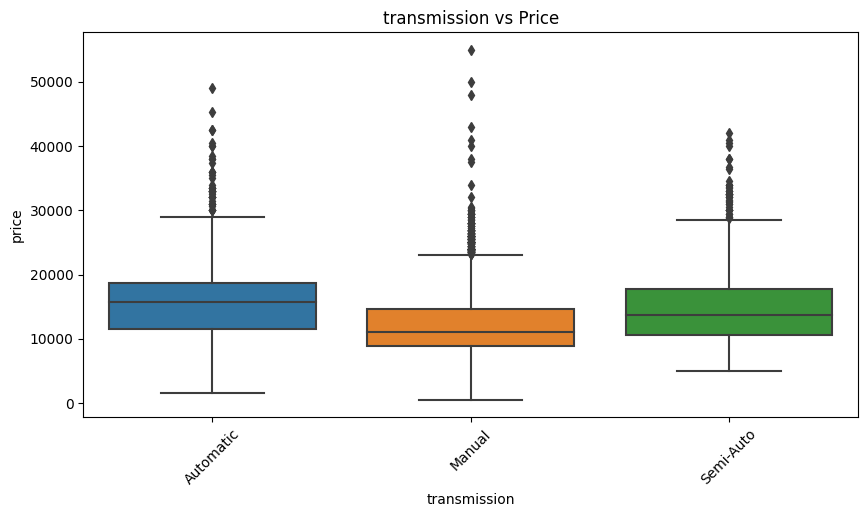

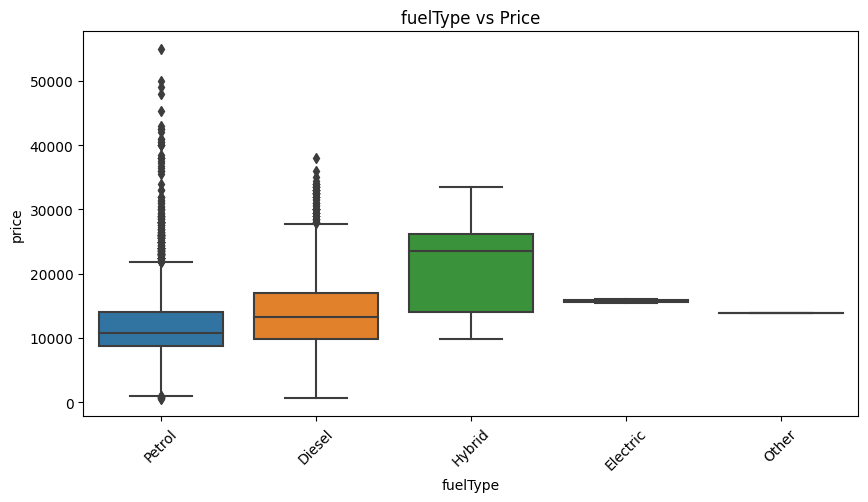

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[col], y=df["price"])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Price")
    plt.show()


In [11]:
X = df.drop("price", axis=1)
y = df["price"]


In [12]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64','float64']).columns


In [14]:
preprocessor = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ("scaler", StandardScaler(), num_cols)
])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

model_ohe = LinearRegression()
model_ohe.fit(X_train_transformed, y_train)

y_pred_ohe = model_ohe.predict(X_test_transformed)
r2_ohe = r2_score(y_test, y_pred_ohe)


In [17]:
n = X_test_transformed.shape[0]
p = X_test_transformed.shape[1]

adjusted_r2_ohe = 1 - (1-r2_ohe)*(n-1)/(n-p-1)

r2_ohe, adjusted_r2_ohe


(0.8458422051672739, 0.8442382011153023)

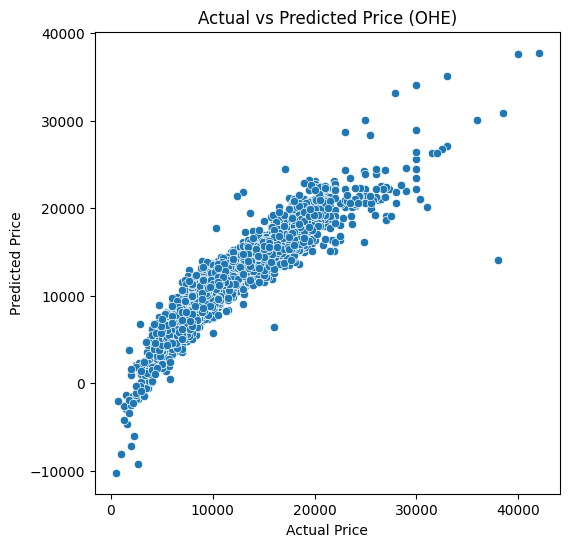

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_ohe)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (OHE)")
plt.show()


In [19]:
df_label = df.copy()
le = LabelEncoder()

for col in cat_cols:
    df_label[col] = le.fit_transform(df_label[col])


In [20]:
X_l = df_label.drop("price", axis=1)
y_l = df_label["price"]

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.2, random_state=42)

scaler_l = StandardScaler()
X_train_l_scaled = scaler_l.fit_transform(X_train_l)
X_test_l_scaled = scaler_l.transform(X_test_l)


In [21]:
model_le = LinearRegression()
model_le.fit(X_train_l_scaled, y_train_l)

y_pred_le = model_le.predict(X_test_l_scaled)
r2_le = r2_score(y_test_l, y_pred_le)

n_l = X_test_l_scaled.shape[0]
p_l = X_test_l_scaled.shape[1]
adjusted_r2_le = 1 - (1-r2_le)*(n_l-1)/(n_l-p_l-1)

r2_le, adjusted_r2_le


(0.7365884288851352, 0.7360006206371801)

In [22]:
print("----- Comparison -----")
print("One-Hot Encoding:")
print("R2:", r2_ohe)
print("Adjusted R2:", adjusted_r2_ohe)

print("\nLabel Encoding:")
print("R2:", r2_le)
print("Adjusted R2:", adjusted_r2_le)


----- Comparison -----
One-Hot Encoding:
R2: 0.8458422051672739
Adjusted R2: 0.8442382011153023

Label Encoding:
R2: 0.7365884288851352
Adjusted R2: 0.7360006206371801
